<a href="https://colab.research.google.com/github/glebishead/CelsiusToFahrenheit/blob/master/main.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [16]:
import numpy as np
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
import matplotlib.pyplot as plt

F = 1.8 * C + 32

y = kx + b

In [ ]:
c = np.array([-273, -100, -40, 0, 10, 14, 38, 50, 100, 400, 800])
f = np.array(c * 1.8 + 32)

Обучающая выборка, пара значение - ответ 

f[i] = 1.8 * c[i] + 32

c - список градусов Цельсия

f - Фаренгейта

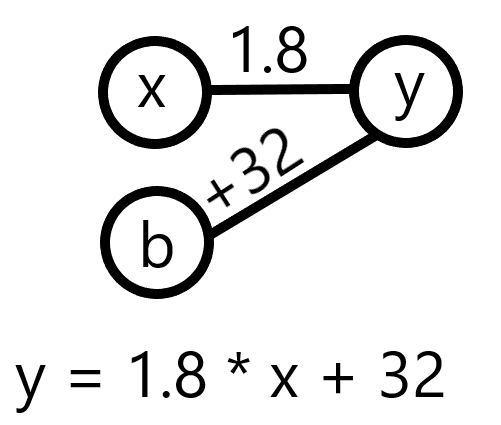

In [11]:
model = Sequential()
model.add(Dense(units=1, input_shape=(1,), activation='linear'))
model.compile(loss='mean_squared_error', optimizer=Adam(0.1))

Создание модели, её компиляция

In [12]:
history = model.fit(c, f, epochs=500)

Epoch 1/500
1/1 [==============================] - 1s 531ms/step - loss: 21842.7676
Epoch 2/500
1/1 [==============================] - 0s 10ms/step - loss: 14371.7070
Epoch 3/500
1/1 [==============================] - 0s 9ms/step - loss: 8599.8994
Epoch 4/500
1/1 [==============================] - 0s 8ms/step - loss: 4514.4824
Epoch 5/500
1/1 [==============================] - 0s 9ms/step - loss: 2034.2496
Epoch 6/500
1/1 [==============================] - 0s 10ms/step - loss: 978.2189
Epoch 7/500
1/1 [==============================] - 0s 10ms/step - loss: 1043.2747
Epoch 8/500
1/1 [==============================] - 0s 7ms/step - loss: 1817.1497
Epoch 9/500
1/1 [==============================] - 0s 7ms/step - loss: 2847.6628
Epoch 10/500
1/1 [==============================] - 0s 9ms/step - loss: 3747.9351
Epoch 11/500
1/1 [==============================] - 0s 7ms/step - loss: 4277.8076
Epoch 12/500
1/1 [==============================] - 0s 6ms/step - loss: 4360.1362
Epoch 13/500
1/1 [=

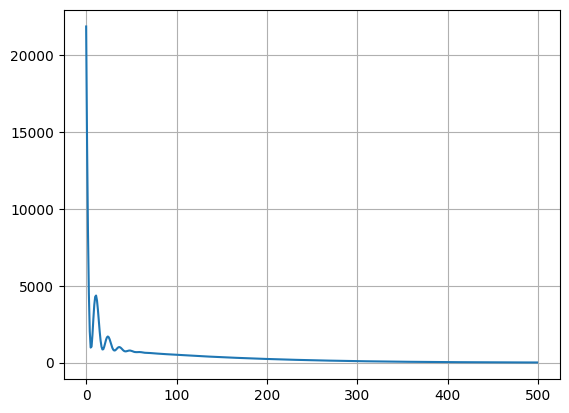

In [17]:
plt.plot(history.history['loss'])
plt.grid(True)
plt.show()

In [19]:
print(model.predict([100]))
print(100 * 1.8 + 32)

1/1 [==============================] - 0s 36ms/step
[[208.99367]]
212.0


Существует разница, пробуем дообучить

In [29]:
new_c = np.array(range(1000))
new_f = np.array(c * 1.8 + 32)

new_history = model.fit(new_c, new_f, epochs=500, verbose=False)

Дообучили модель


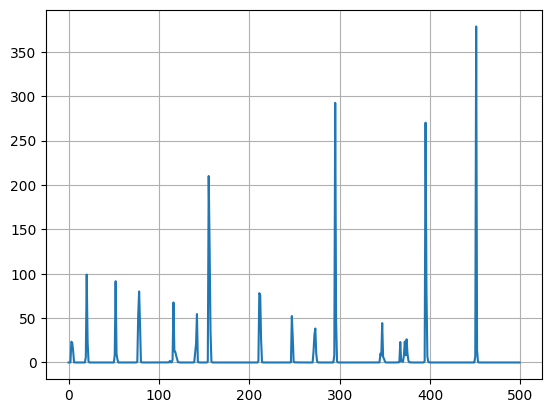

In [30]:
plt.plot(new_history.history['loss'])
plt.grid(True)
plt.show()

In [ ]:
for i in range(-100, 100):
  print(model.predict([i]))
  print(i * 1.8 + 32)

Тест

In [ ]:
for i in range(-1000, -100):
  result = model.predict([i])
  if abs(i * 1.8 + 32 - result) >= 0.1:
    print(result)

In [36]:
print(model.get_weights())

[array([[1.8000045]], dtype=float32), array([32.00002], dtype=float32)]


Практически совпадают. Хорошая точность для нейронной сети